In [1]:
import vipy
import torch
import numpy as np
from keynet.system import PermutationKeynet
from keynet.mnist import LeNet_AvgPool

In [2]:
net = LeNet_AvgPool()
net.load_state_dict(torch.load('../models/mnist_lenet_avgpool.pth'));
inshape = (1,28,28)

In [3]:
# Create a paired (sensor, model) for a keyed sensor and keynet pair
(sensor, model) = PermutationKeynet(inshape, net, do_output_encryption=False)

[keynet.layers.KeyNet]: Keying "conv1"
[keynet.layers.KeyNet]: Keying "relu1"
[keynet.layers.KeyNet]: Keying "pool1"
[keynet.layers.KeyNet]: Keying "conv2"
[keynet.layers.KeyNet]: Keying "relu2"
[keynet.layers.KeyNet]: Keying "pool2"
[keynet.layers.KeyNet]: Keying "fc1"
[keynet.layers.KeyNet]: Keying "relu3"
[keynet.layers.KeyNet]: Keying "fc2"
[keynet.layers.KeyNet]: Keying "relu4"
[keynet.layers.KeyNet]: Keying "fc3"


In [4]:
# The output of the keynet is identical to the output of the source network
img_plain = sensor.load('owl.jpg').tensor()
img_cipher = sensor.load('owl.jpg').encrypt().tensor()

yh = model.forward(img_cipher).detach().numpy().flatten()
y = net.forward(img_plain).detach().numpy().flatten()
assert np.allclose(y, yh, atol=1E-5)

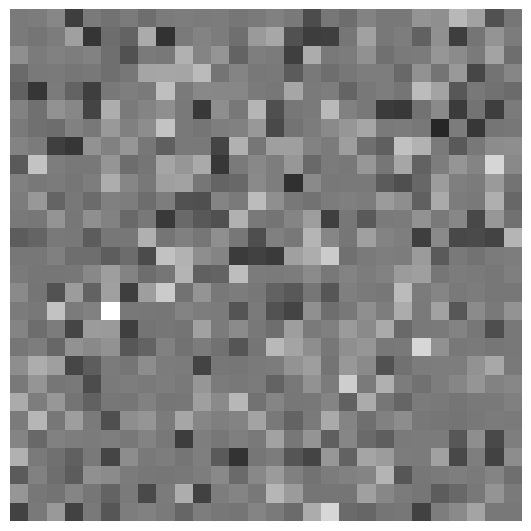

In [5]:
# This is the keyed image, input to the keynet
im_cipher = sensor.encrypt().image().resize(512, 512, interp='nearest').show()

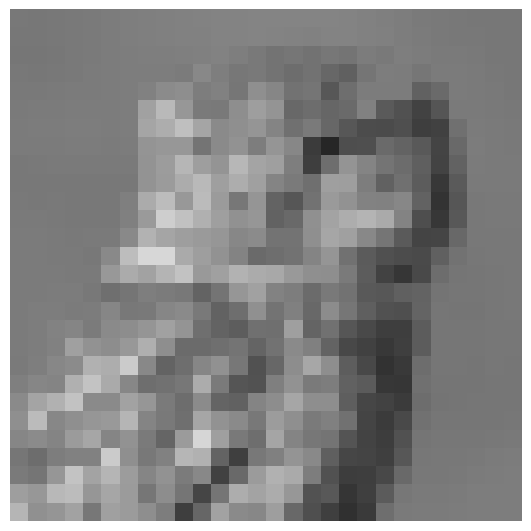

In [6]:
# This is the original image, resized to be (28x28), and input into the lenet network
im_plain = sensor.decrypt().image().resize(512, 512, interp='nearest').show()